In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

In [2]:
ls

CONTRIBUTING.md      Round 3.....ipynb    Untitled.ipynb
LICENSE.md           Round 4.ipynb        data/
README.md            Round 5.ipynb        halfway-there.gif
Round 1.ipynb        Round 6-Copy1.ipynb
Round 2.....ipynb    Round 6.ipynb


In [3]:
data = pd.read_csv("data/kc_house_data.csv")

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
data = data.reset_index()

In [7]:
columns = data.columns.to_list()
columns

['index',
 'id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [8]:
data.columns = data.columns.str.replace(' ', '')

In [9]:
data = data.drop(columns=['index', 'id'])

In [10]:
cols = list(data.columns)
cols = [cols[1]] + cols[:1] + cols[2:]
data = data[cols]

In [11]:
data.shape

(21597, 18)

In [12]:
data.dtypes

price            float64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Need to check on possibly modification of data types for the following columns:

1.) sqft_basement

2.) date

In [13]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [14]:
errors = []
for idx in data.index:
    try: 
        float(data.sqft_basement[idx])
    except:
        errors.append(idx)

In [15]:
data.iloc[errors].sqft_basement.value_counts()

?    454
Name: sqft_basement, dtype: int64

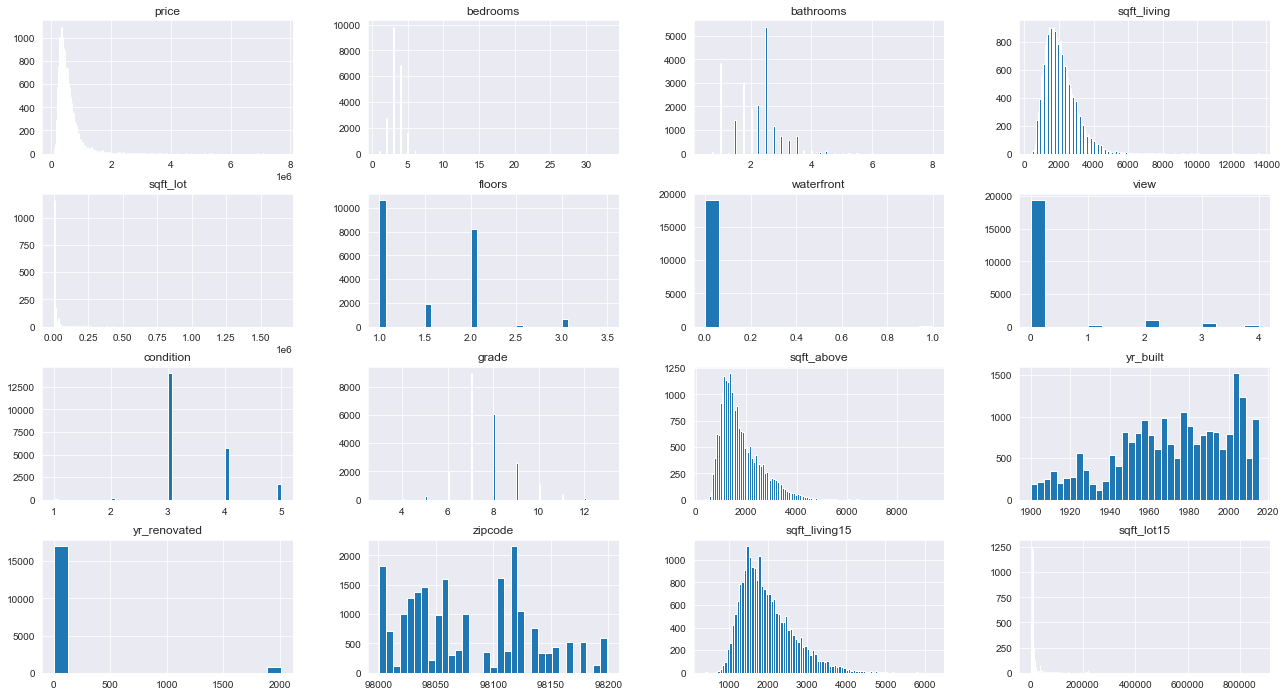

In [16]:
data.hist(figsize  = [22, 12], bins = 'auto');

#### I can replace nan's or missing data with their mean, for the following columns: price, sqft_living, sqft_lot, sqft_above, sqft_living15 and sqft_lot 15

In [17]:
data['sqft_basement'] = pd.to_numeric(data.sqft_basement, errors="coerce")
data['yr_renovated'] = pd.to_numeric(data.yr_renovated, errors="coerce")

In [18]:
column_means = data.mean()
data = data.fillna(column_means)

In [19]:
data['price'] = data['price'].astype(int)
data['bathrooms'] = data['bathrooms'].astype(int)
data['floors'] = data['floors'].astype(int)
data['waterfront'] = data['waterfront'].astype(int)
data['view'] = data['view'].astype(int)

In [20]:
data['sqft_basement'] = data['sqft_basement'].astype(int)
data['yr_renovated'] = data['yr_renovated'].astype(int)

In [21]:
data.dtypes

price             int64
date             object
bedrooms          int64
bathrooms         int64
sqft_living       int64
sqft_lot          int64
floors            int64
waterfront        int64
view              int64
condition         int64
grade             int64
sqft_above        int64
sqft_basement     int64
yr_built          int64
yr_renovated      int64
zipcode           int64
sqft_living15     int64
sqft_lot15        int64
dtype: object

In [22]:
data.head()

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900,10/13/2014,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000,12/9/2014,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000,2/25/2015,2,1,770,10000,1,0,0,3,6,770,0,1933,83,98028,2720,8062
3,604000,12/9/2014,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000,2/18/2015,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [23]:
#data.to_csv('Semi-Editted', index = False)

# Feature Engineering Time

In [24]:
data['age'] = 2021 - data.yr_built
data = data.drop(columns=['yr_built'], axis=1)

In [25]:
#Convert date column to 2 separate columns for month and year
date = data['date'].str.split('/', expand=True)
data['month_sold'] = date[0].astype('int64')
data['year_sold'] = date[2].astype('int64')
#Drop original date column
data.drop(columns=['date'], axis=1, inplace=True)

In [26]:
# Let's change yr_renovated to a binary column? Since it's not manadatory to have renovated your home

data.yr_renovated.fillna(0.0, inplace=True)
#Create renovated column
data['renovated'] = data.year_sold - data.yr_renovated
#Replace any values less than 10 with 1, and any values over 10 with 0renovated = df.renovated.values
age = data.age.values
values = np.where(data.renovated <= 10, 1, 0)
data['renovated'] = np.where(age <= 5, 1, values)
#Drop yr_renovated column
data.drop(columns=['yr_renovated'], axis=1, inplace=True)

In [27]:
# sqft_livingsquare  -  footage of the home
# sqft_lotsquare-  footage of the lot

# sqft_above - square footage of house apart from basement
# sqft_basement - square footage of the basement

# sqft_above + sqft_basement = sqft_livingsquare
data['yard_space'] = data.sqft_lot - data.sqft_living

In [28]:
data['price_log'] = np.log(data['price'])
data['sqft_living_log'] = np.log(data['sqft_living'])
data['sqft_lot15_log'] = np.log(data['sqft_lot15'])
data['sqft_living15_log'] = np.log(data['sqft_living15'])
# data['xxx_log'] = np.log(data['xxx'])

In [29]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,age,month_sold,year_sold,renovated,yard_space,price_log,sqft_living_log,sqft_lot15_log,sqft_living15_log
0,221900,3,1,1180,5650,1,0,0,3,7,...,5650,66,10,2014,0,4470,12.309982,7.073270,8.639411,7.200425
1,538000,3,2,2570,7242,2,0,0,3,7,...,7639,70,12,2014,0,4672,13.195614,7.851661,8.941022,7.432484
2,180000,2,1,770,10000,1,0,0,3,6,...,8062,88,2,2015,0,9230,12.100712,6.646391,8.994917,7.908387
3,604000,4,3,1960,5000,1,0,0,5,7,...,5000,56,12,2014,0,3040,13.311329,7.580700,8.517193,7.215240
4,510000,3,2,1680,8080,1,0,0,3,8,...,7503,34,2,2015,0,6400,13.142166,7.426549,8.923058,7.495542


# Correlation

In [30]:
data_corr = data.corr()
data_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,age,month_sold,year_sold,renovated,yard_space,price_log,sqft_living_log,sqft_lot15_log,sqft_living15_log
price,1.000000,0.308787,0.510631,0.701917,0.089876,0.237264,0.264306,0.393497,0.036056,0.667951,...,0.082845,-0.053953,-0.009928,0.003727,0.073734,0.074584,0.891745,0.611839,0.147913,0.543829
bedrooms,0.308787,1.000000,0.465995,0.578212,0.032471,0.158065,-0.002127,0.078354,0.026496,0.356563,...,0.030690,-0.155670,-0.001046,-0.009949,0.024346,0.019723,0.343360,0.621820,0.162238,0.406631
bathrooms,0.510631,0.465995,1.000000,0.698591,0.086029,0.486404,0.059587,0.175111,-0.127328,0.607156,...,0.082039,-0.434536,0.004087,-0.021699,0.053010,0.070797,0.511357,0.677009,0.072745,0.500864
sqft_living,0.701917,0.578212,0.698591,1.000000,0.173453,0.353372,0.104637,0.281715,-0.059445,0.762779,...,0.184342,-0.318152,0.012112,-0.029014,0.030274,0.151831,0.695185,0.954607,0.321020,0.732180
sqft_lot,0.089876,0.032471,0.086029,0.173453,1.000000,-0.008603,0.021459,0.075054,-0.008830,0.114731,...,0.718204,-0.052946,-0.002591,0.005628,-0.013557,0.999760,0.100025,0.150102,0.550135,0.145162
floors,0.237264,0.158065,0.486404,0.353372,-0.008603,1.000000,0.018321,0.023711,-0.293463,0.473273,...,-0.012766,-0.578549,0.013083,-0.019523,-0.012706,-0.016497,0.286106,0.363827,-0.208712,0.291710
waterfront,0.264306,-0.002127,0.059587,0.104637,0.021459,0.018321,1.000000,0.380543,0.016648,0.082818,...,0.030658,0.024487,0.008199,-0.005018,0.000432,0.019208,0.170720,0.078900,0.081562,0.076503
view,0.393497,0.078354,0.175111,0.281715,0.075054,0.023711,0.380543,1.000000,0.045622,0.249082,...,0.073083,0.054452,-0.005161,0.001239,0.023967,0.069058,0.344653,0.244804,0.119119,0.262556
condition,0.036056,0.026496,-0.127328,-0.059445,-0.008830,-0.293463,0.016648,0.045622,1.000000,-0.146896,...,-0.003126,0.361592,0.022388,-0.045898,-0.065082,-0.007539,0.038918,-0.049620,0.079862,-0.089255
grade,0.667951,0.356563,0.607156,0.762779,0.114731,0.473273,0.082818,0.249082,-0.146896,1.000000,...,0.120981,-0.447865,0.008989,-0.030635,0.018676,0.098174,0.703720,0.743038,0.185000,0.689054


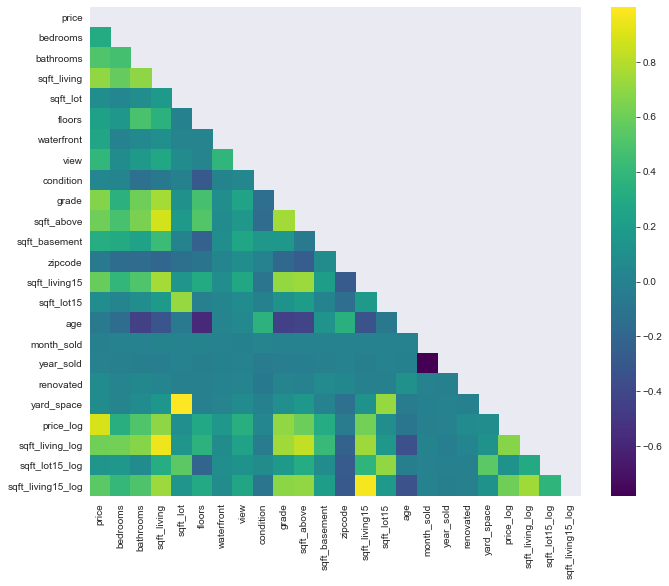

In [31]:
mask = np.triu(np.ones_like(data_corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(data_corr, mask=mask, ax=ax1, cmap="viridis");

# Further Data Exploration of Selected Independent variable

In [32]:
model1_cols = ['price_log', 'sqft_living_log', 'view', 'grade', 'age', 'waterfront', 'bathrooms', 'bedrooms', 'sqft_lot15_log', 'year_sold', 'condition', 'floors', 'sqft_living15_log','renovated', 'month_sold']
model1 = data[model1_cols]

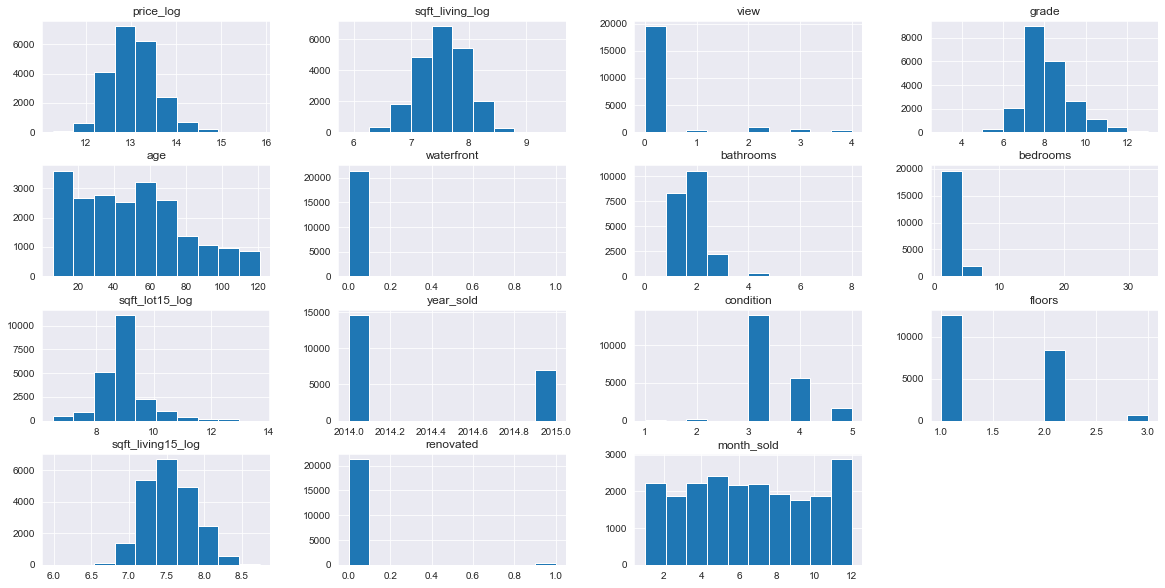

In [33]:
model1.hist(figsize  = [20, 10]); 

In [34]:
def bootstrap(df,column,target,sample_size=300):
    unique = df[column].unique()
    for val in unique:
        samples = []
        frame = df[df[column] == val]
        for i in range(sample_size):
            sample = np.random.choice(frame[target], size = frame.shape[0], replace = True)
            samples.append(sample.mean())
        plt.hist(samples, label = val, alpha =.7)
    plt.legend();

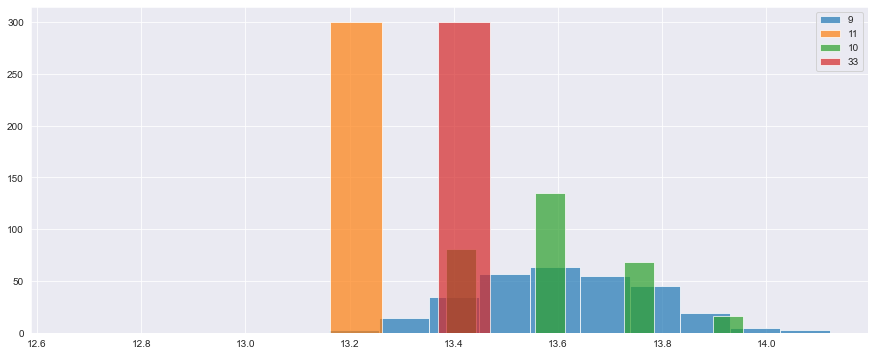

In [35]:
plt.figure(figsize = (15,6))
frame = model1[model1.bedrooms>8]
bootstrap(frame,'bedrooms','price_log')

No handles with labels found to put in legend.


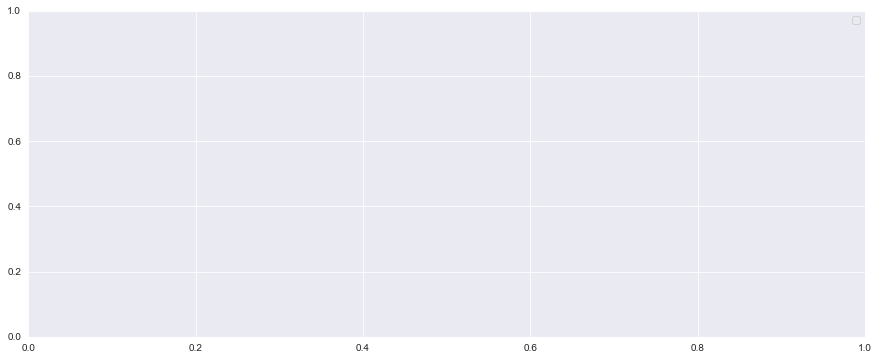

In [36]:
plt.figure(figsize = (15,6))
frame = model1[model1.sqft_living_log>5000]
bootstrap(frame,'sqft_living_log','price')

No handles with labels found to put in legend.


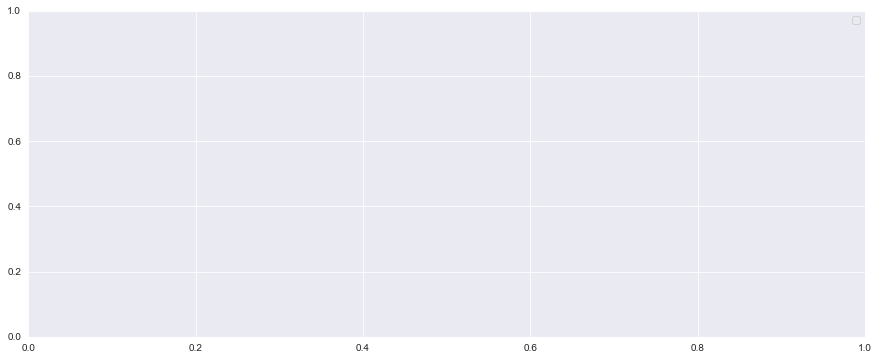

In [37]:
plt.figure(figsize = (15,6))
frame = model1[model1.sqft_living15_log>4000]
bootstrap(frame,'sqft_living15_log','price')

In [38]:
# Removing Outliers
model1 = model1[model1.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

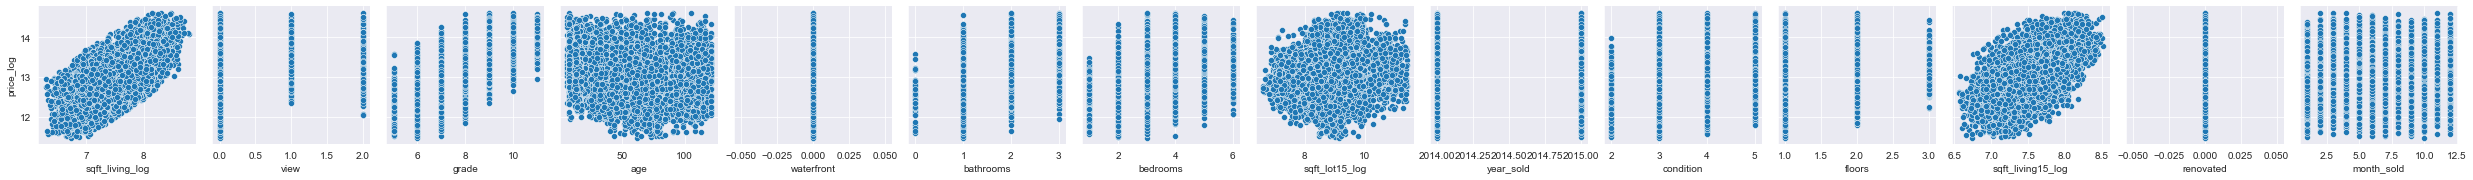

In [39]:
sns.pairplot(data = model1,
                y_vars=['price_log'],
                x_vars=['sqft_living_log', 'view', 'grade', 'age', 'waterfront', 'bathrooms', 'bedrooms', 'sqft_lot15_log', 'year_sold', 'condition', 'floors', 'sqft_living15_log','renovated', 'month_sold'])

# Linear Regression Model

In [40]:
fsm_df1 = model1.copy()
fsm_df1.dropna(inplace=True)

In [41]:
fsm1 = ols(formula ="price_log ~ sqft_living_log + view + grade + age + waterfront + bathrooms + bedrooms + sqft_lot15_log + year_sold + condition + floors + sqft_living15_log + month_sold", data = fsm_df1)
fsm_results1 = fsm1.fit()

In [42]:
fsm_results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     2432.
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:11:15   Log-Likelihood:                -4252.8
No. Observations:               19675   AIC:                             8532.
Df Residuals:                   19662   BIC:                             8634.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -76.9036     14.876     -5.170      0.000    -106.061     -47.746
sqft_living_log       0.3589      0.011     32.008      0.000       0.337       0.381
view                  0.0477      0.005      9.113      0.000       0.037       0.058
grade                 0.2108      0.003     63.582      0.000       0.204       0.217
age                   0.0058      0.000     56.727      0.000       0.006       0.006
waterfront        -2.139e-13   4.14e-14     -5.168      0.000   -2.95e-13   -1.33e-13
bathrooms             0.0560      0.005     11.506      0.000       0.046       0.066
bedrooms             -0.0349      0.003    -10.375      0.000      -0.041      -0.028
sqft_lot15_log       -0.1001      0.004    -26.877      0.000      -0.107      -0.093
year_sold             0.0416      0.007      5.641      0.000       0.027       0.056
condition             0.0475      0.004     12.982      0.000       0.040       0.055
floors                0.0449      0.006      7.898      0.000       0.034       0.056
sqft_living15_log     0.2826      0.011     25.180      0.000       0.261       0.305
month_sold            0.0002      0.001      0.176      0.860      -0.002       0.002
==============================================================================
Omnibus:                       37.807   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.361
Skew:                          -0.088   Prob(JB):                     2.84e-09
Kurtosis:                       3.131   Cond. No.                     3.23e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.68e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#  Model 1, Evaluation:

We are explaining about roughly 60% of the variance in home price, with our 14 features so far and it's statistically significant.

According to our model:

 - For each additional footage of the home, we expect the home price to increase 171
 
 - For each additional bathroom, we expect the home price to increase by 9600
 
 - ...
 

## Linearity Model 1 Assumption 

The null hypothesis is that the model is linearly predicted by the features, alternative hypothesis is that it is not. 

Thus returning a p-value above .05 means that the current model does meet the linearity assumption.

In [43]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_results1)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 0.9793599478226508
Rainbow p-value: 0.849414143177961


## Normality Model 1 Assumption

Linear regression assumes that the residuals are normally distributed. The null hypothesis is that the residuals are normally distributed, alternative hypothesis is that they are not. 

Thus returning a low p-value means that the current model violates the normality assumption.

In [44]:
# Jarque-Bera (JB): 39.361
# ]Prob(JB): 2.84e-09

In [ ]:
#Check qqplots vs non-log/log

## Homoscadasticity for Model 1:

Linear regression assumes that the variance of the dependent variable is homogeneous across different value of the independent variable(s). 

We can visualize this by looking at the predicted life expectancy vs. the residuals.

The null hypothesis is homoscedasticity, alternative hypothesis is heteroscedasticity. 

Thus returning a low p-value means that the current model violates the homoscedasticity assumption.

In [45]:
y = fsm_df1["price_log"]
y_hat = fsm_results1.predict()

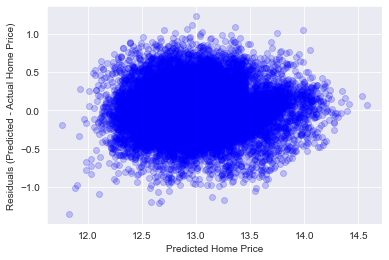

In [46]:
fig2, ax2 = plt.subplots()
ax2.set(xlabel="Predicted Home Price",
        ylabel="Residuals (Predicted - Actual Home Price)")
ax2.scatter(x = y_hat, y = y_hat-y, color = "blue", alpha=0.2);

In [47]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, fsm_df1[['sqft_living_log', 'view', 'grade', 'age', 'waterfront', 'bathrooms', 'bedrooms', 'sqft_lot15_log', 'year_sold', 'condition', 'floors', 'sqft_living15_log','renovated', 'month_sold']])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: 0.0
F-statistic p-value: 0.0


## Independence for Model 1:

You might have noticed in the regression output that there was a warning about the condition number being high. 

The condition number is a measure of stability of the matrix used for computing the regression and a number above 30 can indicate strong multicollinearity. 

Our output was 3.23e+20

In [48]:
rows = fsm_df1[['sqft_living_log', 'view', 'grade', 'age', 'waterfront', 'bathrooms', 'bedrooms', 'sqft_lot15_log', 'year_sold', 'condition', 'floors', 'sqft_living15_log','renovated', 'month_sold']].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(14)]
vif_df["feature"] = ['sqft_living_log', 'view', 'grade', 'age', 'waterfront', 'bathrooms', 'bedrooms', 'sqft_lot15_log', 'year_sold', 'condition', 'floors', 'sqft_living15_log','renovated', 'month_sold']

vif_df

/Users/sammy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,VIF,feature
0,1552.696699,sqft_living_log
1,1.118002,view
2,139.741958,grade
3,7.553497,age
4,NaN,waterfront
5,16.745377,bathrooms
6,29.176152,bedrooms
7,239.862140,sqft_lot15_log
8,1098.974077,year_sold
9,35.155176,condition


In [70]:
model1.shape

(19675, 15)

# Let's try to standard scale our non-logged columns to improve our assumptions....hopefully

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

model2= model1.copy()
model2_scaled = pd.DataFrame(scaler.fit_transform(model2), columns = model2.columns)
print(model2_scaled.shape)
model2_scaled.head()

(19675, 15)


,price_log,sqft_living_log,view,grade,age,waterfront,bathrooms,bedrooms,sqft_lot15_log,year_sold,condition,floors,sqft_living15_log,renovated,month_sold
0,-1.449410,-1.121296,-0.240515,-0.536452,0.555905,0.0,-1.073634,-0.393200,-0.348384,-0.693376,-0.646539,-0.792683,-1.012572,0.0,1.101079
1,0.421360,0.848989,-0.240515,-0.536452,0.692761,0.0,0.495039,-0.393200,0.083259,-0.693376,-0.646539,1.022076,-0.266599,0.0,1.742702
2,-1.891463,-2.201823,-0.240515,-1.485444,1.308614,0.0,-1.073634,-1.568917,0.160389,1.442218,-0.646539,-0.792683,1.263231,0.0,-1.465410
3,0.665793,0.163125,-0.240515,-0.536452,0.213765,0.0,2.063712,0.782516,-0.523293,-0.693376,2.448887,-0.792683,-0.964947,0.0,1.742702
4,0.308459,-0.227066,-0.240515,0.412540,-0.538943,0.0,0.495039,-0.393200,0.057550,1.442218,-0.646539,-0.792683,-0.063894,0.0,-1.465410


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

mode2_scaling_non_logs = mode2_scaling_non_logs.copy()
mode2_scaling_non_logs = pd.DataFrame(scaler.fit_transform(data), columns =  model1['sqft_living_log', 'view', 'grade', 'age', 'waterfront', 'bathrooms', 'bedrooms', 'sqft_lot15_log', 'year_sold', 'condition', 'floors', 'sqft_living15_log','renovated', 'month_sold'])

In [73]:
fsm_df2 = model2_scaled.copy()
fsm_df2.dropna(inplace=True)

In [74]:
fsm2 = ols(formula ="price_log ~ sqft_living_log + view + grade + age + waterfront + bathrooms + bedrooms + sqft_lot15_log + year_sold + condition + floors + sqft_living15_log + month_sold", data = fsm_df1)
fsm_results2 = fsm2.fit()

In [75]:
fsm_results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     2432.
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:24:27   Log-Likelihood:                -4252.8
No. Observations:               19675   AIC:                             8532.
Df Residuals:                   19662   BIC:                             8634.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -76.9036     14.876     -5.170      0.000    -106.061     -47.746
sqft_living_log       0.3589      0.011     32.008      0.000       0.337       0.381
view                  0.0477      0.005      9.113      0.000       0.037       0.058
grade                 0.2108      0.003     63.582      0.000       0.204       0.217
age                   0.0058      0.000     56.727      0.000       0.006       0.006
waterfront        -2.139e-13   4.14e-14     -5.168      0.000   -2.95e-13   -1.33e-13
bathrooms             0.0560      0.005     11.506      0.000       0.046       0.066
bedrooms             -0.0349      0.003    -10.375      0.000      -0.041      -0.028
sqft_lot15_log       -0.1001      0.004    -26.877      0.000      -0.107      -0.093
year_sold             0.0416      0.007      5.641      0.000       0.027       0.056
condition             0.0475      0.004     12.982      0.000       0.040       0.055
floors                0.0449      0.006      7.898      0.000       0.034       0.056
sqft_living15_log     0.2826      0.011     25.180      0.000       0.261       0.305
month_sold            0.0002      0.001      0.176      0.860      -0.002       0.002
==============================================================================
Omnibus:                       37.807   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.361
Skew:                          -0.088   Prob(JB):                     2.84e-09
Kurtosis:                       3.131   Cond. No.                     3.23e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.68e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#  Model 2, Evaluation:

We are explaining about roughly 60% of the variance in home price, with our 14 features so far and it's statistically significant.

According to our model:

 - For each additional footage of the home, we expect the home price to increase 171
 
 - For each additional bathroom, we expect the home price to increase by 9600
 
 - ...
 

## Linearity Model 2 Assumption 

The null hypothesis is that the model is linearly predicted by the features, alternative hypothesis is that it is not.

We reject the null hypothesis when the p-value is less than α, which is .05. 

We fail to reject the alternative hypothesis when the p-value is higher than α, which is .05.

Thus returning a p-value above .05 means that the current model fails to reject the linearity assumption.

In [76]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_results2)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 0.9793599478226508
Rainbow p-value: 0.849414143177961


## Normality Model 1 Assumption

Linear regression assumes that the residuals are normally distributed. 

The null hypothesis is that the residuals are normally distributed, alternative hypothesis is that they are not. 

Thus returning a low p-value means that the current model rejects the normality assumption.

In [56]:
# Jarque-Bera (JB):	39.361
# Prob(JB): 2.84e-09

## Homoscadasticity for Model 2:

Linear regression assumes that the variance of the dependent variable is homogeneous across different value of the independent variable(s). 

We can visualize this by looking at the predicted life expectancy vs. the residuals.

The null hypothesis is homoscedasticity, alternative hypothesis is heteroscedasticity. 

Thus returning a low p-value means that the current model violates the homoscedasticity assumption.

In [77]:
y2 = fsm_df2["price_log"]
y_hat2 = fsm_results2.predict()

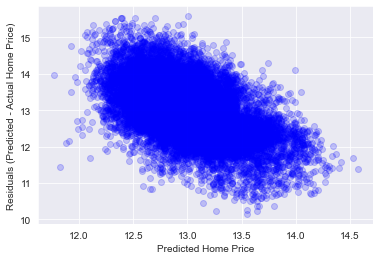

In [78]:
fig2, ax2 = plt.subplots()
ax2.set(xlabel="Predicted Home Price",
        ylabel="Residuals (Predicted - Actual Home Price)")
ax2.scatter(x = y_hat2, y = y_hat2-y2, color = "blue", alpha=0.2);

In [79]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y2-y_hat2, fsm_df2[['sqft_living_log', 'view', 'grade', 'age', 'waterfront', 'bathrooms', 'bedrooms', 'sqft_lot15_log', 'year_sold', 'condition', 'floors', 'sqft_living15_log','renovated', 'month_sold']])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: 1.0403724292168811e-10
F-statistic p-value: 3.823132779766805e-11


## Independence for Model 1:

You might have noticed in the regression output that there was a warning about the condition number being high. 

The condition number is a measure of stability of the matrix used for computing the regression and a number above 30 can indicate strong multicollinearity. 

Our output was 3.23e+20

In [80]:
rows = fsm_df2[['sqft_living_log', 'view', 'grade', 'age', 'waterfront', 'bathrooms', 'bedrooms', 'sqft_lot15_log', 'year_sold', 'condition', 'floors', 'sqft_living15_log','renovated', 'month_sold']].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(14)]
vif_df["feature"] = ['sqft_living_log', 'view', 'grade', 'age', 'waterfront', 'bathrooms', 'bedrooms', 'sqft_lot15_log', 'year_sold', 'condition', 'floors', 'sqft_living15_log','renovated', 'month_sold']

vif_df

/Users/sammy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,VIF,feature
0,4.277831,sqft_living_log
1,1.057025,view
2,2.660437,grade
3,1.938084,age
4,NaN,waterfront
5,2.098194,bathrooms
6,1.782674,bedrooms
7,1.475334,sqft_lot15_log
8,2.603499,year_sold
9,1.216642,condition
